In [54]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import glob
import os
from scipy import signal

In [275]:
VID_PAIRS = [
    ('VID_20210416_165909', 'VID_20210416_165929'),
    ('VID_20210416_170519', 'VID_20210416_170539'),
    ('VID_20210416_170118', 'VID_20210416_170139'),
    ('VID_20210416_170301', 'VID_20210416_170321'),
    ('VID_20210416_170802', 'VID_20210416_170822')
]

dfs = []
for p in VID_PAIRS:
    VID_1 = p[0]
    VID_2 = p[1]

    out_images_1 = sorted(glob.glob('./TMP_MROB_1/VID/' + VID_1 + "/*"))
    out_images_2 = sorted(glob.glob('./TMP_MROB_2/VID/' + VID_2 + "/*"))
    image_timestamps_1 = (list(map(lambda x: int(os.path.splitext(os.path.basename(x))[0]), out_images_1)))
    image_timestamps_2 = (list(map(lambda x: int(os.path.splitext(os.path.basename(x))[0]), out_images_2)))
#     print(len(image_timestamps_1))
#     print(len(image_timestamps_2))
#     print(os.path.splitext(os.path.basename(out_images_1[0])))
#     print(os.path.splitext(os.path.basename(out_images_2[0])))


    # for stamp in image_timestamps_2:
    #     print(make_filename(stamp, 2))
    #     img = cv2.imread(make_filename(stamp, 2))
    #     print(img.shape[1])
    # print(os.path.splitext(os.path.basename(out_images_1[-1])))
    # print(os.path.splitext(os.path.basename(out_images_2[-1])))

    THRESHOLD_NS = 100000

    left = pd.DataFrame({'t' : image_timestamps_1, 'left' : image_timestamps_1, 'file_left' : out_images_1},
                        )
    right = pd.DataFrame({'t' : image_timestamps_2, 'right' : image_timestamps_2, 'file_right' : out_images_2}, 
                         )

    # align by nearest, because we need to account for frame drops
    df = pd.merge_asof(left, right, on='t',
                  tolerance=THRESHOLD_NS,
                  allow_exact_matches=True,
                  direction='nearest')
    # merge again with left to avoid duplicates
    # df = left.merge(x[['right','index']], how='left', left_index=True, right_on='index').set_index('index')

#     print(os.path.splitext(os.path.basename(out_images_1[-1])))
#     print(os.path.splitext(os.path.basename(out_images_2[-1])))



#     print(df.head())
    df = df.dropna()

#     print(os.path.splitext(os.path.basename(out_images_1[-1])))
#     print(os.path.splitext(os.path.basename(out_images_2[-1])))

    # df['diff_mcs'] = np.abs(df.left - df.right)/1e4
    df = df.reset_index(drop=True)

#     print(df.head())
    print(df.shape[0])
    dfs.append(df)


# plt.plot(df['diff_mcs'])
# print(df.left.get(0))

1098
1183
1167
1156
1054


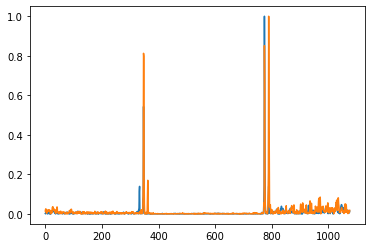

[347 774]
427


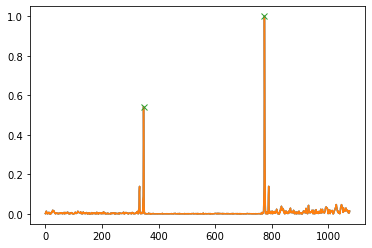

[-5]


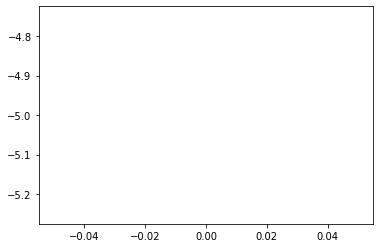

In [276]:
# TODO: flash period
PERIOD = 0


VID_1 = VID_PAIRS[0][0]
VID_2 = VID_PAIRS[0][1]
df = dfs[0]
shifts = []
for i in range(1):
    img1_path = df.file_left.get(i)
    img2_path = df.file_right.get(i)
#     print(img1_path)

#     print(img2_path)
    img1 = cv2.imread(img1_path, cv2.CV_8UC1)
    img2 = cv2.imread(img2_path, cv2.CV_8UC1)
    plt.plot(vert_grads(img1))
    plt.plot(vert_grads(img2))
    plt.show()
    a = vert_grads(img1)
    b = vert_grads(img2)
    res = np.argmax(signal.correlate(a, b, method='direct'))
    shift = (res - closest_multiple(res, img1.shape[0]))
    shifts.append(shift)
    plt.plot(vert_grads(img1))
    x = vert_grads(img1).flatten()
    # period:
    peaks, _ = signal.find_peaks(x, height=0, threshold=0.2)
    print(peaks)
    plt.plot(x)
    
    PERIOD = peaks[1] - peaks[0]
    print(PERIOD)
    plt.plot(peaks, x[peaks], "x")
    
#     plt.plot(np.roll(vert_grads(img2), shift))
    plt.show()
plt.plot(shifts)
print(shifts)
plt.show()


In [267]:
def make_filename(timestamp, vid_num):
    tmp = VID_1
    if vid_num == 2:
        tmp = VID_2
    
        
    return os.path.join('./TMP_MROB_%d/VID/' % vid_num, tmp, '%d.png' % timestamp)

In [268]:
def closest_multiple(a, b):
    return int(b * np.round(a * 1.0 / b))

In [286]:
PERIOD

427

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 20, 5, 20, 20, 5, 20, 20, 5, 20, 5, 5, 20, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 5, 5, 20, 5, 5, 20, 20, 5, 20, 5, 5, 20, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 5, 20, 5, 20, 5, 20, 5, 5, 20, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 20, 5, 5, 20, 20, 5, 5, 20, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 5, 20, 20, 20, 5, 20, 20, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 5, 20, 20, 20, 20, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 5, 5, 20, 20, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 5, 20, 20, 5, 5, 5, 5, 5, 5, 5, 5, 5

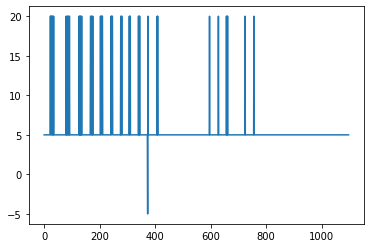

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

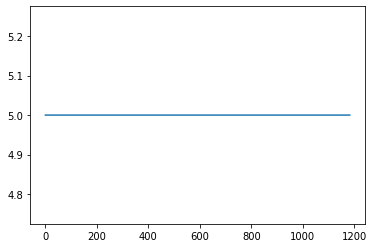

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 

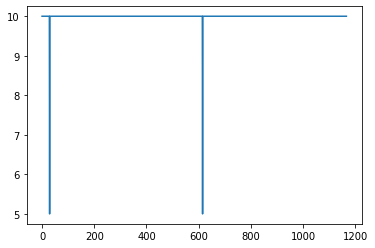

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

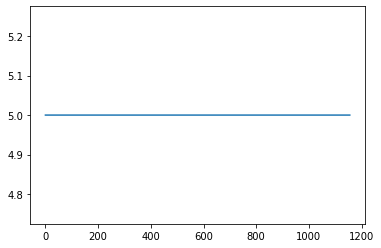

[-5, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 5, 20, 20, 5, 20, 20, 5, 20, 20, 5, 20, 5, 5, 20, 5, 20, 5, 5, 20, 5, 5, 20, 5, 5, 20, 5, 5, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 5, 20, 5, 20, 5, 20, 5, 20, 20, 5, 5, 5, 5, 20, 5, 20, 5, 20, 5, 20, 5, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 5, 20, 5, 5, 5, 20, 5, 20, 20, 20, 20, 5, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 5, 20, 5, 20, 5, 5, 5, 5, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 5, 5, 20, 5, 20, 5, 5, 20, 5, 20, 5, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 5, 20, 5, 20, 20, 5, 5, 5, 5, 5, 5, 5, 5, 20, 20, 5, 5, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 20, 20, 20, 20, 20, 5, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 5, 20, 5, 20, 5, 20, 5,

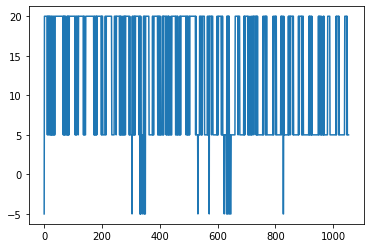

In [291]:
from statistics import mode
md = {}
for i, p in enumerate(VID_PAIRS):
    VID_1 = p[0]
    VID_2 = p[1]
    df = dfs[i]
    shifts = []
    for i in range(0, df.shape[0], 1):
        img1_path = df.file_left.get(i)
        img2_path = df.file_right.get(i)
    #     print(img1_path)

    #     print(img2_path)
        img1 = cv2.imread(img1_path, cv2.CV_8UC1)
        img2 = cv2.imread(img2_path, cv2.CV_8UC1)
    #     plt.plot(vert_grads(img1))
    #     plt.plot(vert_grads(img2))
    #     plt.show()
        a = vert_grads(img1)
        b = vert_grads(img2)
        res = np.argmax(signal.correlate(a, b))
        res = res - closest_multiple(res, img1.shape[0])
        shift = (np.abs(res) - closest_multiple(np.abs(res), PERIOD))
        shifts.append(shift)
    #     plt.plot(vert_grads(img1))
    #     plt.plot(np.roll(vert_grads(img2), shift))
    #     plt.show()
    plt.plot(shifts)
    print(shifts)
    print(mode(shifts))
    md[p] = mode(shifts)
    plt.show()

In [292]:
print(md)

{('VID_20210416_165909', 'VID_20210416_165929'): 5, ('VID_20210416_170519', 'VID_20210416_170539'): 5, ('VID_20210416_170118', 'VID_20210416_170139'): 10, ('VID_20210416_170301', 'VID_20210416_170321'): 5, ('VID_20210416_170802', 'VID_20210416_170822'): 20}


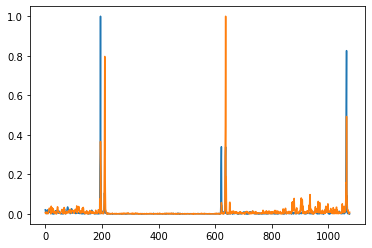

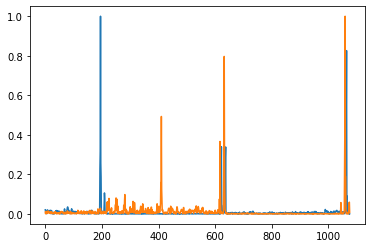

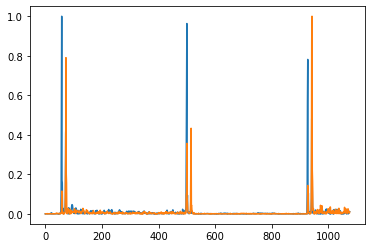

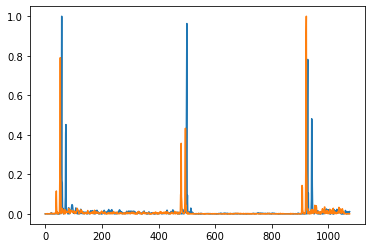

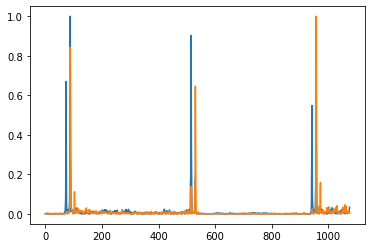

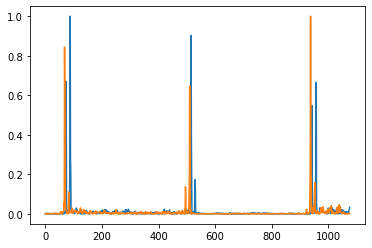

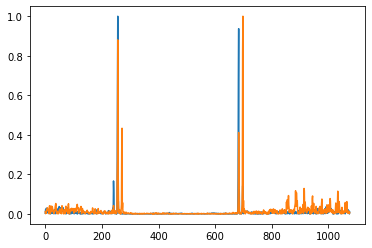

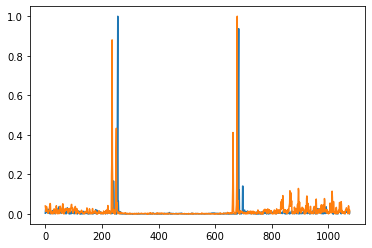

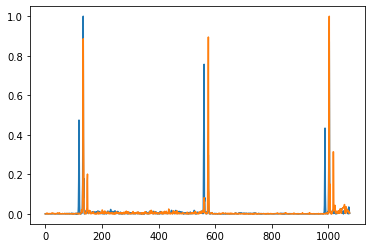

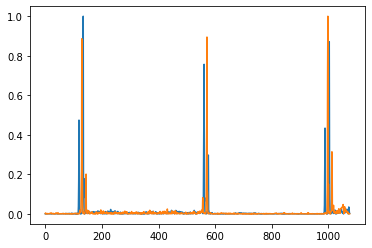

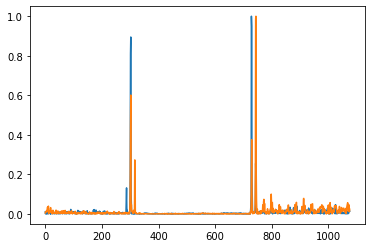

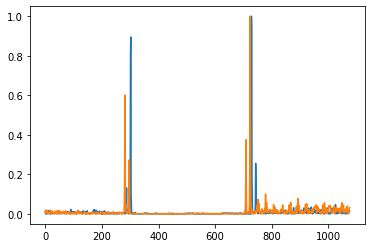

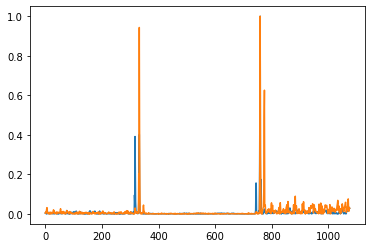

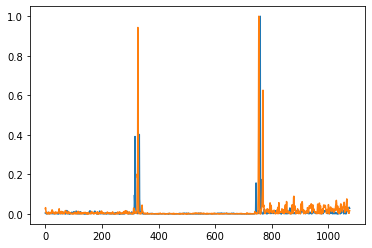

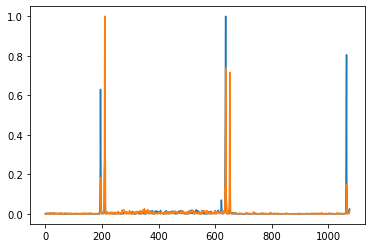

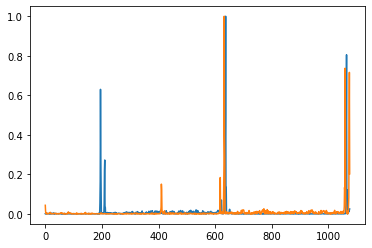

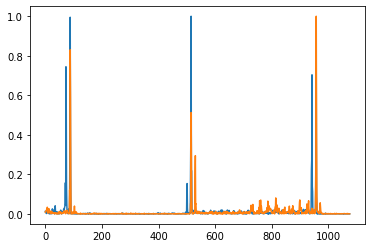

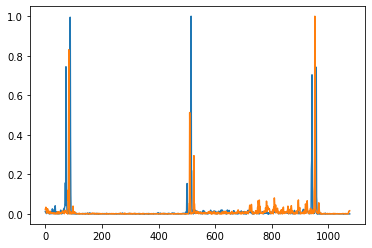

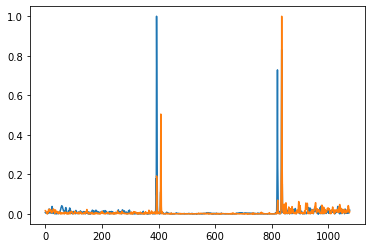

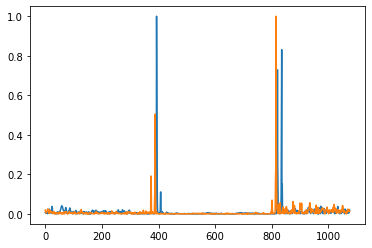

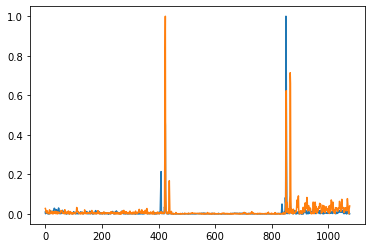

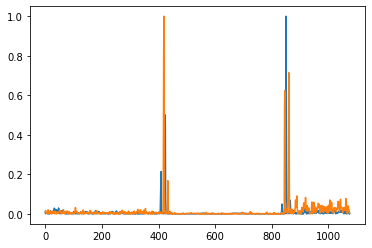

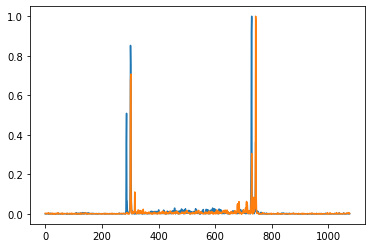

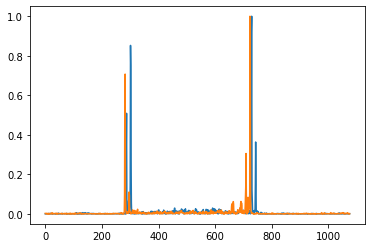

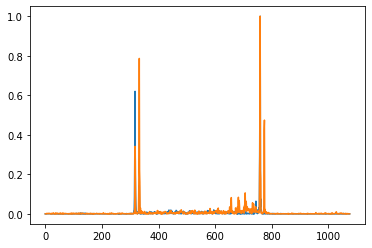

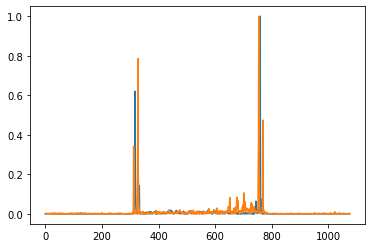

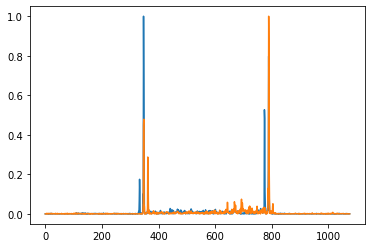

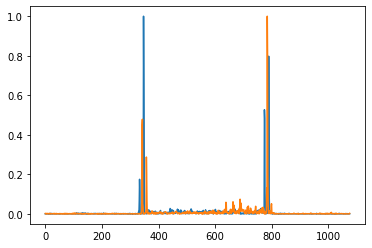

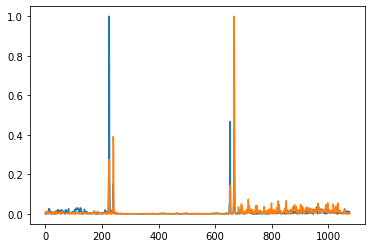

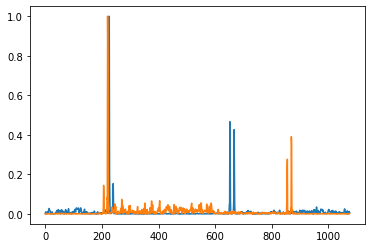

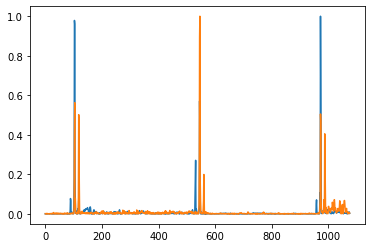

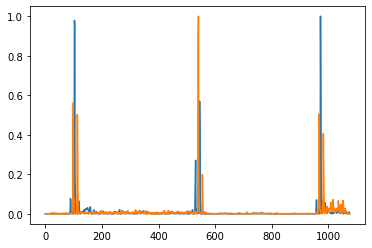

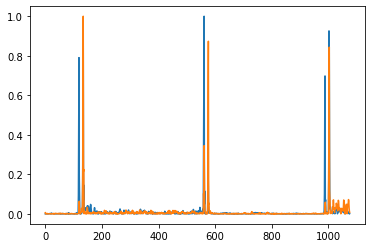

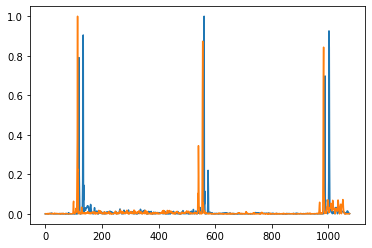

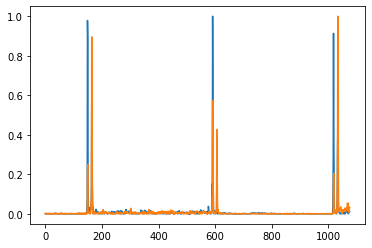

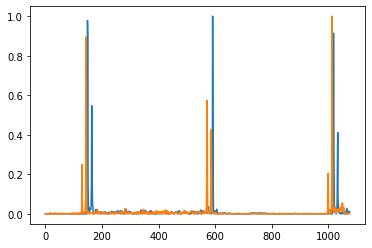

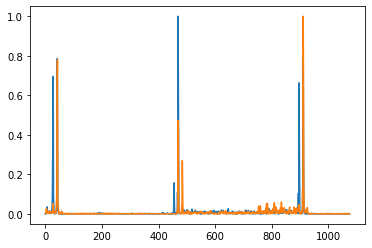

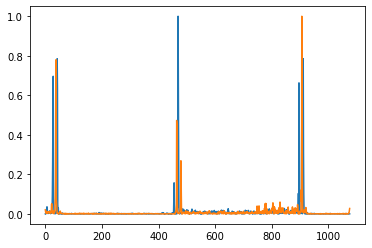

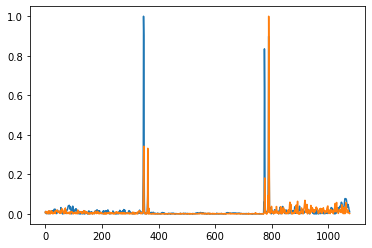

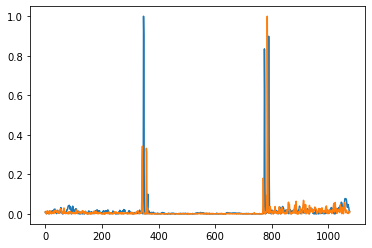

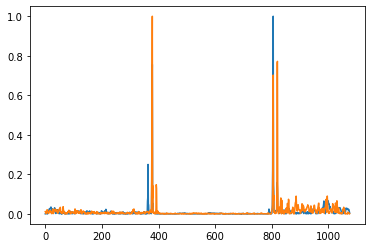

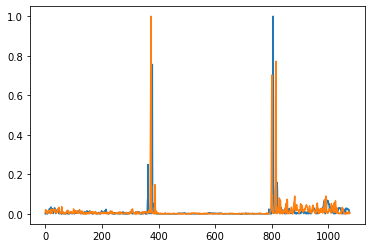

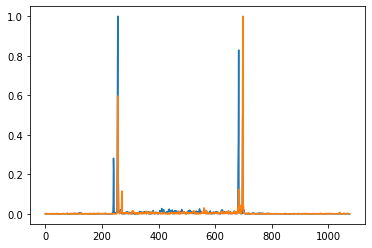

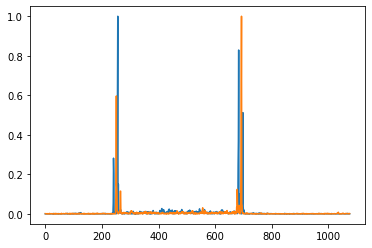

[422, -20, -20, -20, -5, -20, -5, 422, -5, -20, -5, -20, -5, -5, -447, -5, -20, -20, -5, -5, -5, -5]


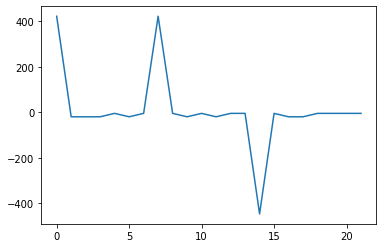

In [252]:
VID_1 = VID_PAIRS[4][0]
VID_2 = VID_PAIRS[4][1]
df = dfs[4]
shifts = []
for i in range(0, df.shape[0],50):
    img1_path = df.file_left.get(i)
    img2_path = df.file_right.get(i)
#     print(img1_path)

#     print(img2_path)
    img1 = cv2.imread(img1_path, cv2.CV_8UC1)
    img2 = cv2.imread(img2_path, cv2.CV_8UC1)
    plt.plot(vert_grads(img1))
    plt.plot(vert_grads(img2))
    plt.show()
    a = vert_grads(img1)
    b = vert_grads(img2)
    res = np.argmax(signal.correlate(a, b, method='direct'))
    shift = (res - closest_multiple(res, img1.shape[0]))
    shifts.append(shift)
    plt.plot(vert_grads(img1))
    plt.plot(np.roll(vert_grads(img2), shift))
    plt.show()
plt.plot(shifts)
print(shifts)
plt.show()

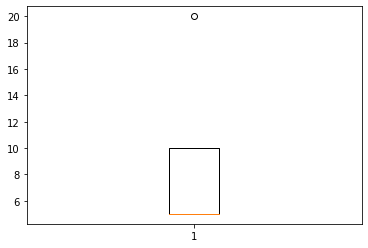

In [288]:
from scipy import stats
results = np.array([5,5,5,10,20])
plt.ylabel = 'Difference in the number of rows'
plt.boxplot(results)
plt.show()

In [9]:
def vert_grads(img):
    x1 = np.ones(img.shape[1]) * (-1)
    x2 = np.ones(img.shape[1]) * (8)
    x3 = np.ones(img.shape[1]) * (0)
    x4 = np.ones(img.shape[1]) * (-8)
    x5 = np.ones(img.shape[1]) * (1)
    filt = np.vstack((x1, x2, x3, x4, x5))

    grad = scipy.signal.convolve2d(img, filt, mode='valid')
    grad_magn = np.abs(grad)
    grad_magn_norm = grad_magn / max(grad_magn)
    
    return grad_magn_norm

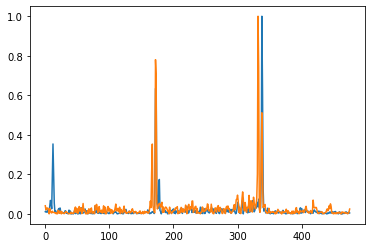

In [214]:
img1 = cv2.imread('imgs/sm1.png', cv2.CV_8UC1)
img2 = cv2.imread('imgs/sm2_sync.png', cv2.CV_8UC1)

plt.plot(vert_grads(img1))
plt.plot(vert_grads(img2))
plt.show()

In [215]:
a = vert_grads(img1)
b = vert_grads(img2)
shift = np.argmax(signal.correlate(a, b)) % img1.shape[0]
shift

1

In [4]:
a = vert_grads(img1)
b = vert_grads(img2)
np.argmax(signal.correlate(a, b)) % img1.shape[0]

1

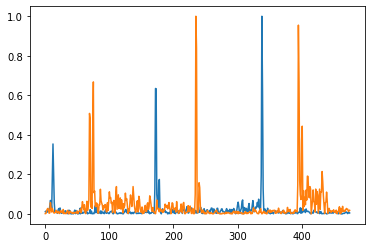

In [5]:
img1 = cv2.imread('imgs/sm1.png', cv2.CV_8UC1)
img2 = cv2.imread('imgs/sm2_not_sync.png', cv2.CV_8UC1)

plt.plot(vert_grads(img1))
plt.plot(vert_grads(img2))
plt.show()

In [6]:
a = vert_grads(img1)
b = vert_grads(img2)
shift = np.argmax(signal.correlate(a, b)) % img1.shape[0]
shift

98

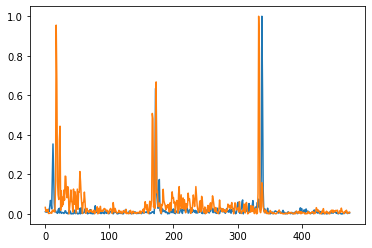

In [7]:
plt.plot(vert_grads(img1))
plt.plot(np.roll(vert_grads(img2), shift))